/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


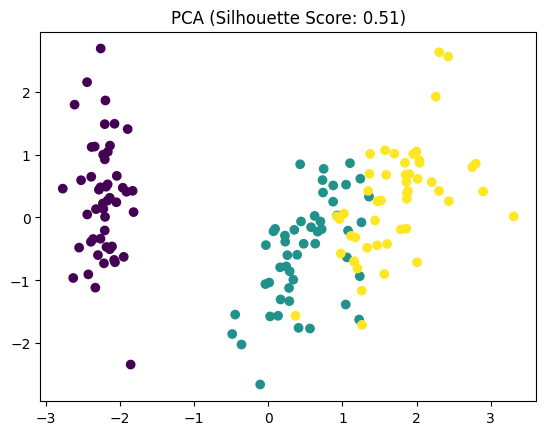

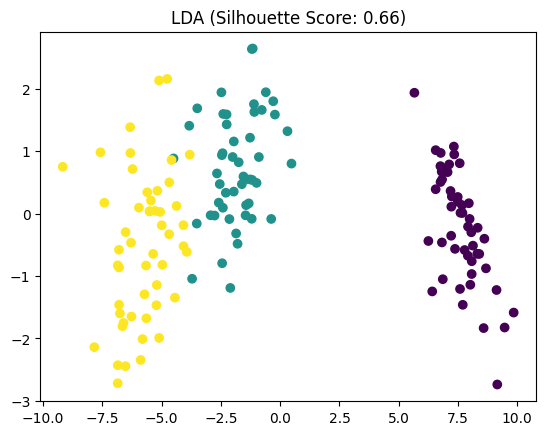

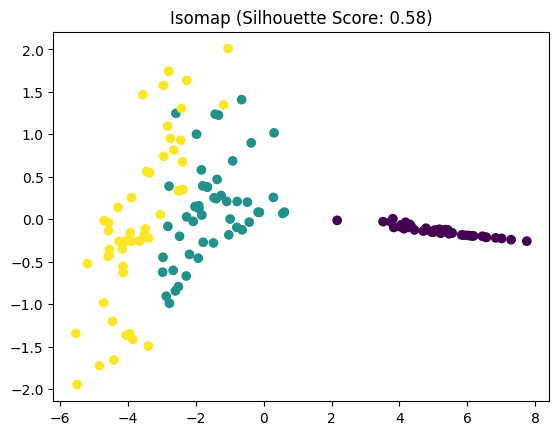

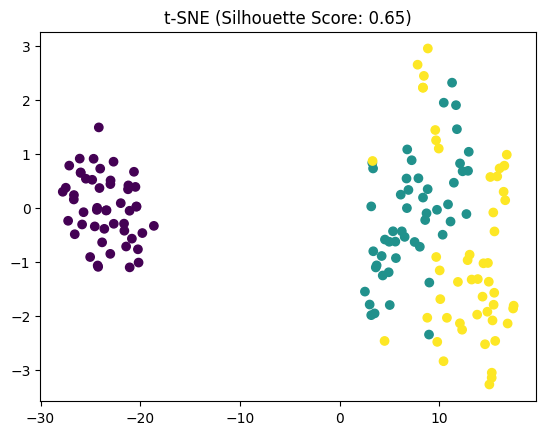

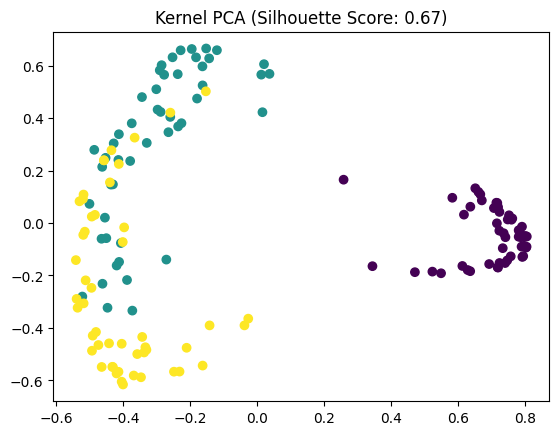

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FastICA, KernelPCA
from sklearn.manifold import TSNE, Isomap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics  # Importing metrics for silhouette score
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the techniques to test
techniques = {
    "PCA": PCA(n_components=2),
    "LDA": LDA(n_components=2),
    "Isomap": Isomap(n_components=2),
    "t-SNE": TSNE(n_components=2),
    "Kernel PCA": KernelPCA(n_components=2, kernel='rbf'),
}

# Autoencoder
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(4, input_dim=input_dim, activation='relu'))  # Encoder
    model.add(Dense(2, activation='relu'))                        # Bottleneck
    model.add(Dense(4, activation='relu'))                        # Decoder
    model.add(Dense(input_dim, activation='linear'))             # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

autoencoder = create_autoencoder(X_scaled.shape[1])
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=10, verbose=0)
X_autoencoded = autoencoder.predict(X_scaled)

# Performance Testing
results = {}
for name, technique in techniques.items():
    if name == "LDA":  # LDA requires labels
        X_transformed = technique.fit_transform(X_scaled, y)
    else:
        X_transformed = technique.fit_transform(X_scaled)
    
    # Evaluate Clustering or any other performance metrics
    kmeans = KMeans(n_clusters=3)
    labels = kmeans.fit_predict(X_transformed)
    silhouette_score = metrics.silhouette_score(X_transformed, labels)
    
    results[name] = {
        'embedding': X_transformed,
        'silhouette_score': silhouette_score
    }

# Visualize Results
for name, res in results.items():
    plt.figure()
    plt.scatter(res['embedding'][:, 0], res['embedding'][:, 1], c=y)
    plt.title(f"{name} (Silhouette Score: {res['silhouette_score']:.2f})")
    plt.show()

/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x71c9b81e5e40> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
PCA: [0.27037554586700135, 0.04186792799998359, 0.005178709107154799, 2.7227850712638724e-31]
LDA: [np.float64(0.7537018681778546), np.float64(0.6558160584290523)]
Autoencoder: [0.3397542732925715, 0.07450146600103827, 0.14370245509662544, 0.35868158072707035]
t-SNE: [None, np.float32(0.6482125), None, None]
Isomap: [np.float64(0.6351708839794807), np.float64(0.5841644403284172), np.float64(0.5528590123087703), np.float64(0.5318109908114128)]


ValueError: x and y must have same first dimension, but have shapes (4,) and (2,)

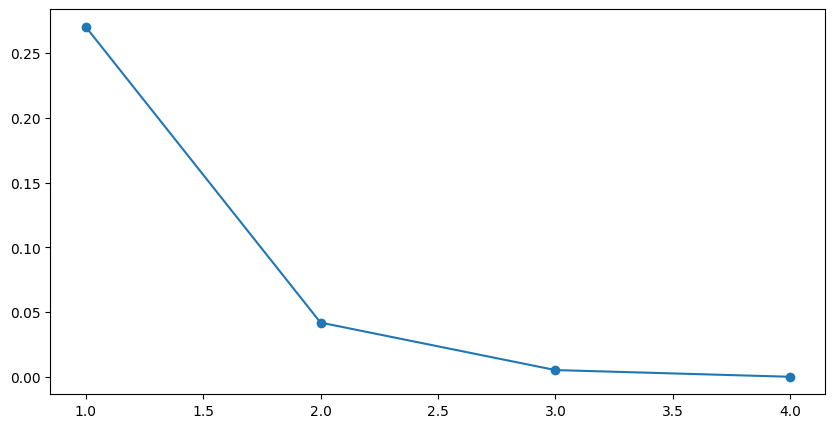

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, silhouette_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define dimensions to test
dimensions = range(1, 5)  # For example, dimensions 1 to 4 for Iris dataset

# Results dictionary
results = {
    "PCA": [],
    "LDA": [],
    "Autoencoder": [],
    "t-SNE": [],
    "Isomap": []
}

# Autoencoder model definition
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(4, input_dim=input_dim, activation='relu'))  # Encoder
    model.add(Dense(2, activation='relu'))                        # Bottleneck
    model.add(Dense(4, activation='relu'))                        # Decoder
    model.add(Dense(input_dim, activation='linear'))             # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Performance Testing
for dim in dimensions:
    # 1. PCA
    if dim <= X.shape[1]:  # Ensure dimensionality is valid
        pca = PCA(n_components=dim)
        X_pca = pca.fit_transform(X_scaled)
        X_reconstructed = pca.inverse_transform(X_pca)
        pca_error = mean_squared_error(X_scaled, X_reconstructed)
        results["PCA"].append(pca_error)

    # 2. LDA (requires labels)
    if dim <= len(np.unique(y)) - 1:  # LDA dimensionality constraint
        lda = LDA(n_components=dim)
        X_lda = lda.fit_transform(X_scaled, y)
        kmeans = KMeans(n_clusters=len(np.unique(y)))
        labels = kmeans.fit_predict(X_lda)
        lda_score = silhouette_score(X_lda, labels)
        results["LDA"].append(lda_score)

    # 3. Autoencoder
    autoencoder = create_autoencoder(X_scaled.shape[1])
    autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=10, verbose=0)
    X_autoencoded = autoencoder.predict(X_scaled)
    autoencoder_error = mean_squared_error(X_scaled, X_autoencoded)
    results["Autoencoder"].append(autoencoder_error)

    # 4. t-SNE (using the first two dimensions for visualization)
    if dim == 2:
        tsne = TSNE(n_components=dim)
        X_tsne = tsne.fit_transform(X_scaled)
        kmeans = KMeans(n_clusters=len(np.unique(y)))
        labels = kmeans.fit_predict(X_tsne)
        tsne_score = silhouette_score(X_tsne, labels)
        results["t-SNE"].append(tsne_score)
    else:
        results["t-SNE"].append(None)  # t-SNE not applicable for dimensions other than 2

    # 5. Isomap
    if dim <= X.shape[1]:  # Ensure dimensionality is valid
        isomap = Isomap(n_components=dim)
        X_isomap = isomap.fit_transform(X_scaled)
        kmeans = KMeans(n_clusters=len(np.unique(y)))
        labels = kmeans.fit_predict(X_isomap)
        isomap_score = silhouette_score(X_isomap, labels)
        results["Isomap"].append(isomap_score)

# Display Results
for method, scores in results.items():
    print(f"{method}: {scores}")

# Optionally plot errors/metrics
plt.figure(figsize=(10, 5))
for method, scores in results.items():
    plt.plot(dimensions, scores, marker='o', label=method)

plt.title("Performance of Dimensionality Reduction Techniques")
plt.xlabel("Number of Dimensions")
plt.ylabel("Error / Score")
plt.xticks(dimensions)
plt.legend()
plt.grid()
plt.show()

/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/home/muhammadinan/autoencoder/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
PCA: [0.9332264957264957, 0.8999099189270343, 0.9666633329999667]
LDA: [0.9666366396423448, 0.9733333333333334]
Autoencoder: [0.8798076923076923, 0.8333166649998334, 0.8999762604529237]
t-SNE: [None, 0.93999399939994, None]
Isomap: [0.8533333333333334, 0.96, 0.9666633329999667]


ValueError: x and y must have same first dimension, but have shapes (3,) and (2,)

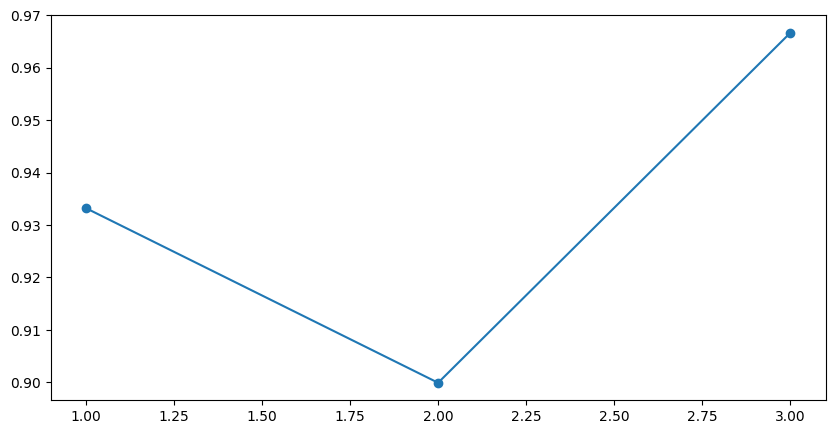

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.pipeline import make_pipeline

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of dimensions to test
dimensions = range(1, 4)  # Test dimensions 1 to 3; LDA will need to be limited to num_classes - 1

# Results dictionary to hold F1 scores
results = {
    "PCA": [],
    "LDA": [],
    "Autoencoder": [],
    "t-SNE": [],
    "Isomap": [],
}

# Autoencoder model definition
def create_autoencoder(input_dim):
    model = Sequential()
    model.add(Dense(4, input_dim=input_dim, activation='relu'))  # Encoder
    model.add(Dense(2, activation='relu'))                        # Bottleneck
    model.add(Dense(4, activation='relu'))                        # Decoder
    model.add(Dense(input_dim, activation='linear'))             # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# F1 Score Calculation
for dim in dimensions:
    # 1. PCA
    if dim <= X.shape[1]:  # Ensure dimensionality is valid
        pca = PCA(n_components=dim)
        X_pca = pca.fit_transform(X_scaled)
        
        # Train classifier and calculate F1 score
        knn = KNeighborsClassifier(n_neighbors=3)
        f1_pca = cross_val_predict(knn, X_pca, y, cv=5, method='predict')
        f1_pca_score = f1_score(y, f1_pca, average='weighted')
        results["PCA"].append(f1_pca_score)

    # 2. LDA (requires labels and limited to n_classes - 1)
    if dim <= len(np.unique(y)) - 1:  
        lda = LDA(n_components=dim)
        X_lda = lda.fit_transform(X_scaled, y)
        
        knn = KNeighborsClassifier(n_neighbors=3)
        f1_lda = cross_val_predict(knn, X_lda, y, cv=5, method='predict')
        f1_lda_score = f1_score(y, f1_lda, average='weighted')
        results["LDA"].append(f1_lda_score)

    # 3. Autoencoder
    autoencoder = create_autoencoder(X_scaled.shape[1])
    autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=10, verbose=0)
    X_autoencoded = autoencoder.predict(X_scaled)
    
    # Apply PCA to reduce dimensionality after autoencoding
    autoencoded_pca = PCA(n_components=dim)
    X_autoencoded_pca = autoencoded_pca.fit_transform(X_autoencoded)

    knn = KNeighborsClassifier(n_neighbors=3)
    f1_autoencoder = cross_val_predict(knn, X_autoencoded_pca, y, cv=5, method='predict')
    f1_autoencoder_score = f1_score(y, f1_autoencoder, average='weighted')
    results["Autoencoder"].append(f1_autoencoder_score)

    # 4. t-SNE (typically for 2 dimensions)
    if dim == 2:
        tsne = TSNE(n_components=dim)
        X_tsne = tsne.fit_transform(X_scaled)
        
        knn = KNeighborsClassifier(n_neighbors=3)
        f1_tsne = cross_val_predict(knn, X_tsne, y, cv=5, method='predict')
        f1_tsne_score = f1_score(y, f1_tsne, average='weighted')
        results["t-SNE"].append(f1_tsne_score)
    else:
        results["t-SNE"].append(None)  # t-SNE not applicable for dimensions other than 2

    # 5. Isomap
    if dim <= X.shape[1]:  # Ensure dimensionality is valid
        isomap = Isomap(n_components=dim)
        X_isomap = isomap.fit_transform(X_scaled)
        
        knn = KNeighborsClassifier(n_neighbors=3)
        f1_isomap = cross_val_predict(knn, X_isomap, y, cv=5, method='predict')
        f1_isomap_score = f1_score(y, f1_isomap, average='weighted')
        results["Isomap"].append(f1_isomap_score)

# Display Results
for method, scores in results.items():
    print(f"{method}: {scores}")

# Optionally, plot F1 scores
print(f"Dimensions = {dimensions}")
plt.figure(figsize=(10, 5))
for method, scores in results.items():
    plt.plot(dimensions, scores, marker='o', label=method)

plt.title("F1 Scores of Dimensionality Reduction Techniques")
plt.xlabel("Number of Dimensions")
plt.ylabel("F1 Score")
plt.xticks(dimensions)
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.show()